In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [15]:
sf=pd.read_csv('dow.csv',parse_dates=True,index_col=0)
df=np.log(sf['High']/sf['High'].shift(1)).dropna()

In [16]:
df

Date
2022-01-04    0.009221
2022-01-05    0.000482
2022-01-06   -0.013307
2022-01-07   -0.002233
2022-01-10   -0.005723
                ...   
2023-06-26   -0.000478
2023-06-27    0.004607
2023-06-28   -0.002118
2023-06-29    0.007169
2023-06-30    0.009318
Name: High, Length: 374, dtype: float64

In [17]:
adresult=adfuller(df)

In [18]:
adresult[1]

1.4874803486108337e-29

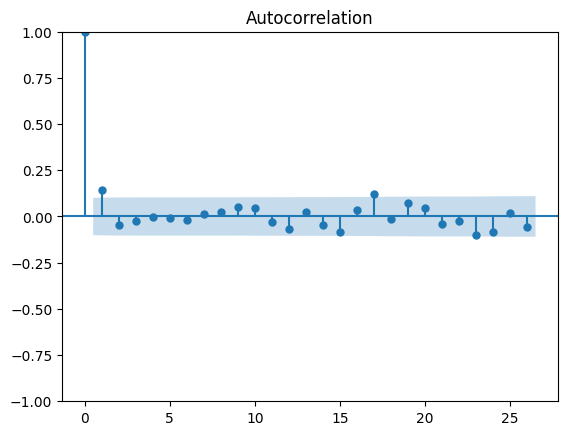

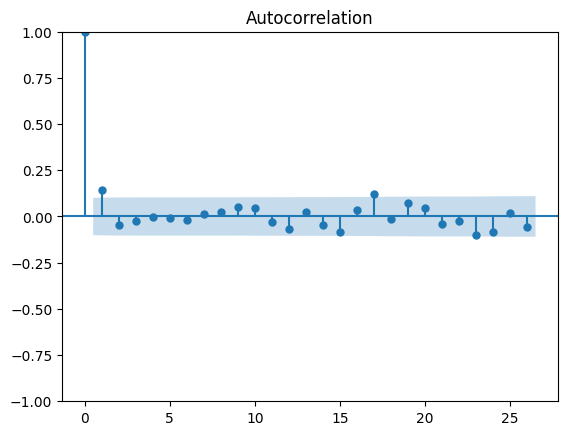

In [19]:
plot_acf(df)

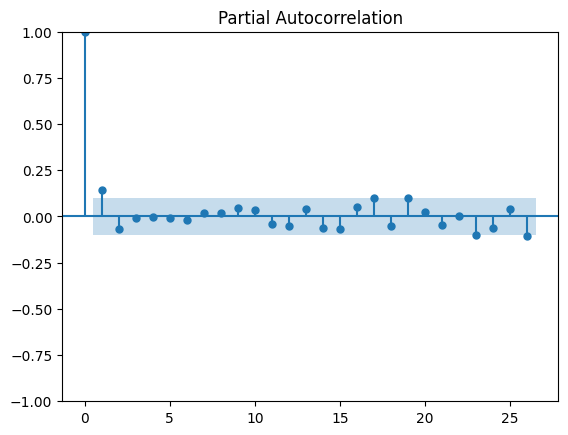

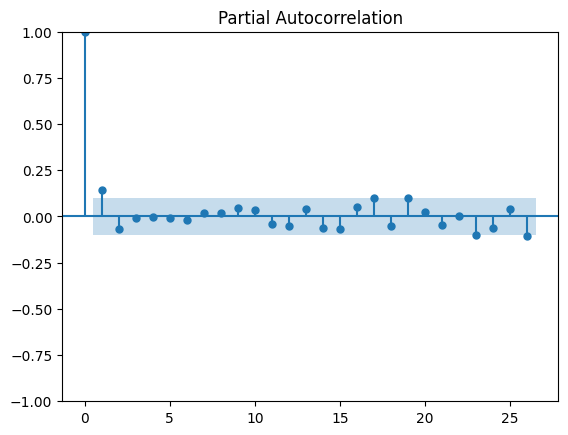

In [20]:
plot_pacf(df)

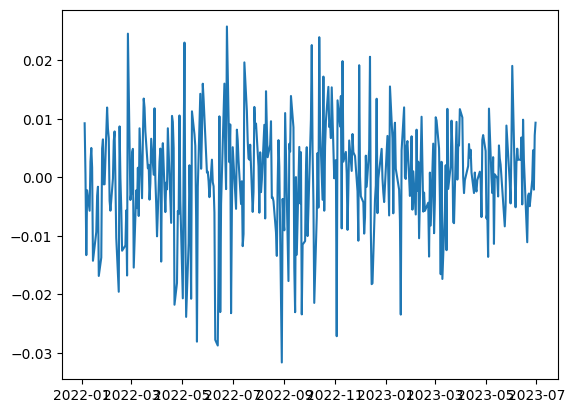

In [21]:
plt.plot(df)

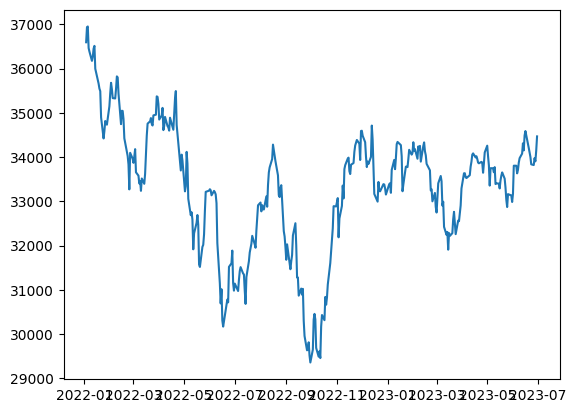

In [22]:
plt.plot(sf)

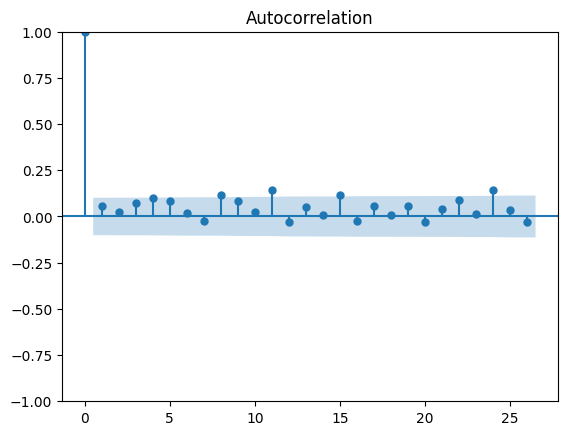

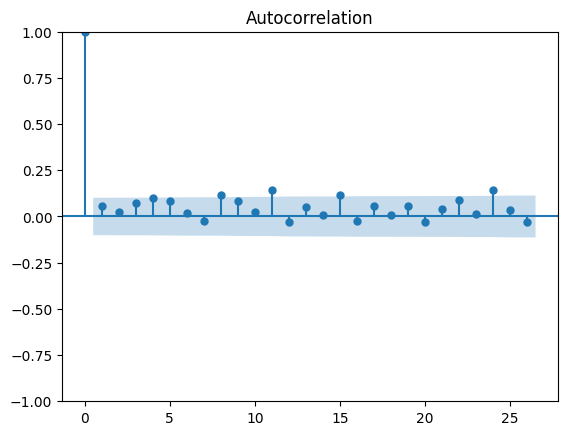

In [23]:
plot_acf(df**2)

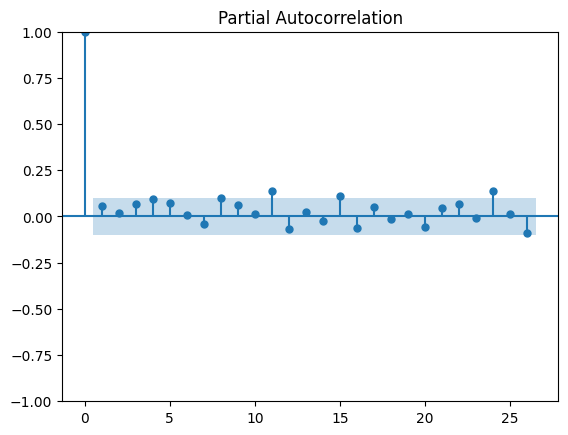

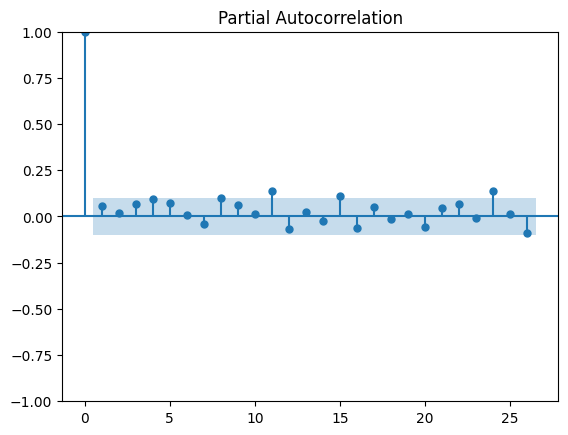

In [24]:
plot_pacf(df**2)

In [25]:
p=[1,5]
q=[1,5,6,9]

In [26]:
train=df[:-30]
test=df[-30:]

In [27]:
df.shape

(374,)

In [30]:
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs
from statsmodels.tsa.stattools import adfuller
from arch import arch_model
from statsmodels.tools.eval_measures import rmse

In [32]:
for i in p:
  for j in q:
      tmp_mdl = smt.ARIMA(train, order=(i,0,j)).fit()
      tmp_aic = tmp_mdl.aic
      tmp_bic=tmp_mdl.bic

      print("Model ORDER is -",i,",",j,"- Model aic : " , tmp_aic, " Model BIC : ", tmp_bic)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Model ORDER is - 1 , 1 - Model aic :  -2211.03816558156  Model BIC :  -2195.675598952066


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Model ORDER is - 1 , 5 - Model aic :  -2203.3716185676667  Model BIC :  -2172.6464853086795


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Model ORDER is - 1 , 6 - Model aic :  -2201.4646959229462  Model BIC :  -2166.8989210065856
Model ORDER is - 1 , 9 - Model aic :  -2195.677132521461  Model BIC :  -2149.58943263298


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Model ORDER is - 5 , 1 - Model aic :  -2203.399882115394  Model BIC :  -2172.674748856407


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Model ORDER is - 5 , 5 - Model aic :  -2195.413270349876  Model BIC :  -2149.325570461395


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Model ORDER is - 5 , 6 - Model aic :  -2193.554562497361  Model BIC :  -2143.626220951507


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Model ORDER is - 5 , 9 - Model aic :  -2193.1483563962547  Model BIC :  -2131.6980898782804


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [35]:
mdl_garch=arch.univariate.ConstantMean(df)
mdl_garch.volatility=arch.univariate.GARCH(1,0,1)
mdl_garch.distribution = arch.univariate.Normal()
mdl_garch_fit = mdl_garch.fit()
print(mdl_garch_fit.summary())
print(mdl_garch_fit.params)
print(pd.DataFrame([mdl_garch_fit.aic, mdl_garch_fit.bic], index = ["AIC","BIC"], columns = ["GARCH"]).T)

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 9.031e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


Iteration:      1,   Func. Count:      6,   Neg. LLF: 2494293324.2562637
Iteration:      2,   Func. Count:     18,   Neg. LLF: -1101.702515990649
Iteration:      3,   Func. Count:     25,   Neg. LLF: -61.88466561269228
Iteration:      4,   Func. Count:     35,   Neg. LLF: 42341988.92521373
Iteration:      5,   Func. Count:     47,   Neg. LLF: 819.4036072750764
Iteration:      6,   Func. Count:     56,   Neg. LLF: 6185607250.291145
Iteration:      7,   Func. Count:     68,   Neg. LLF: 2207656.4661167883
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1219.1139177931118
            Iterations: 10
            Function evaluations: 75
            Gradient evaluations: 7
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                   High   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-L

In [36]:
mdl_forcs = mdl_garch_fit.forecast(horizon = 30)
forc_mean = pd.Series(mdl_forcs.mean.dropna().squeeze())
forc_mean.index = test.index
volatility_mean = pd.Series(mdl_forcs.residual_variance.dropna().squeeze())
volatility_mean.index = forc_mean.index

mean_error = pd.Series(mdl_forcs.variance.dropna().squeeze())
mean_error.index = forc_mean.index
forecast=pd.DataFrame([forc_mean, volatility_mean, mean_error], index =["Forecast", "Volatility", "Forecast Variance"]).T

In [39]:
RMSE1 = rmse(forecast['Forecast'], test)
print(f' The RMSE: {RMSE1:.3f}')

 The RMSE: 0.006
